In [60]:
import pandas as pd

In [61]:
# 각각 season별 데이터 불러오기
bat = pd.read_csv('../data/kbo_batting_stats_by_season_1982-2025.csv')
pitch = pd.read_csv('../data/kbo_pitching_stats_by_season_1982-2025.csv')

In [62]:
# 한화만 가져오기
hanwha_bat = bat[
    (bat['Team'] == '한화') &
    (bat['Year'].between(2023, 2025))
]
hanwha_bat

,Id,Name,Birthdate,Handedness,School,Draft,Year,Team,Age,Pos.,...,GDP,SH,SF,AVG,OBP,SLG,OPS,R/ePA,wRC+,WAR
3799,10014,안치홍,1990년 07월 02일,우투우타,구리-대치중-서울고,09 KIA 2차 1라운드 1순위,2024,한화,34,DH,...,10,1,4,0.300,0.370,0.427,0.797,0.146,107.9,1.38
3800,10014,안치홍,1990년 07월 02일,우투우타,구리-대치중-서울고,09 KIA 2차 1라운드 1순위,2025,한화,35,DH,...,4,4,1,0.172,0.245,0.230,0.475,0.028,22.5,-1.34
4075,10082,이재원,1988년 02월 24일,우투우타,숭의초-상인천중-인천고,06 SK 1차,2024,한화,36,C,...,4,2,5,0.239,0.287,0.291,0.578,0.059,44.0,-0.28
4076,10082,이재원,1988년 02월 24일,우투우타,숭의초-상인천중-인천고,06 SK 1차,2025,한화,37,C,...,3,8,3,0.200,0.280,0.256,0.536,0.058,48.5,0.23
4351,10108,김강민,1982년 09월 13일,우투우타,본리초-대구중-경북고,01 SK 2차 2라운드 18순위,2024,한화,42,CF,...,1,0,0,0.224,0.322,0.263,0.585,0.080,58.8,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9683,16121,페라자,1998년 11월 10일,우투양타,-,24 한화 자유선발,2024,한화,26,LF,...,6,0,2,0.275,0.364,0.486,0.850,0.158,116.7,2.20
9710,16311,이민재,2004년 03월 07일,우투좌타,안산-안산중앙중-비봉고-동원과학기술대,25 한화 11라운드 102순위,2025,한화,21,RF,...,1,0,0,0.000,0.000,0.000,0.000,-0.170,-137.9,-0.12
9711,16312,플로리얼,1997년 11월 25일,우투좌타,-,25 한화 자유선발,2025,한화,28,CF,...,2,0,2,0.271,0.333,0.450,0.783,0.134,111.5,1.78
9723,16372,이승현,2002년 07월 23일,우투좌타,부천원미-부천중-포철고-성균관대,25 한화 육성선수,2025,한화,23,2B,...,0,0,0,1.000,1.000,3.000,4.000,1.328,1314.7,0.16


In [63]:
# 타석, 게임, 출루율, 장타율, 홈런, 볼넷, 유효타석당 득점, 대체선수 대비 승리기여도, 조정 득점 창출력, 타율, 병살타, 타수, 안타, 삼진
cols_1 = ['PA','G','OBP','SLG','HR','BB','R/ePA','WAR','wRC+','AVG','GDP','AB','H','SO']


In [64]:
hanwha_bat_de = hanwha_bat.groupby('Year')[cols_1].describe()

In [65]:
hanwha_bat_de.to_csv('hanwha_bat_yearly_describe.csv', encoding='utf-8-sig')

In [66]:
# 한화만 가져오기
hanwha_pitch = pitch[
    (pitch['Team'] == '한화') &
    (pitch['Year'].between(2023, 2025))
]

In [74]:
cols_2 = ['G', 'IP', 'TBF', 'GS', 'GR', 'ERA', 'WHIP', 'WAR','FIP', 'SO','BB','W','L','S','HD','H']
# [col for col in cols if col not in hanwha_pitch.columns]

In [68]:
hanwha_pitch_de = hanwha_pitch.groupby('Year')[cols_2].describe()

In [69]:
hanwha_pitch_de.to_csv('hanwha_pitch_yearly_describe.csv', encoding='utf-8-sig')

In [70]:
import matplotlib.pyplot as plt

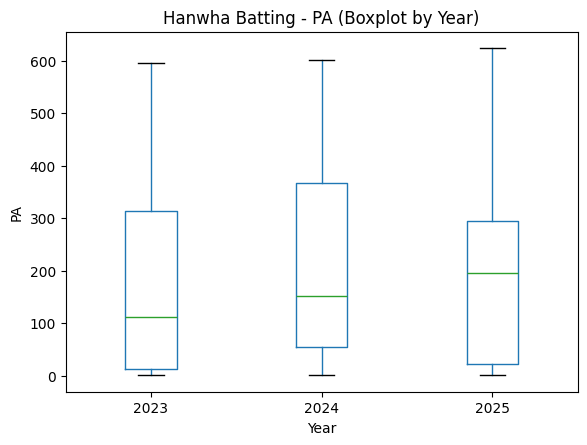

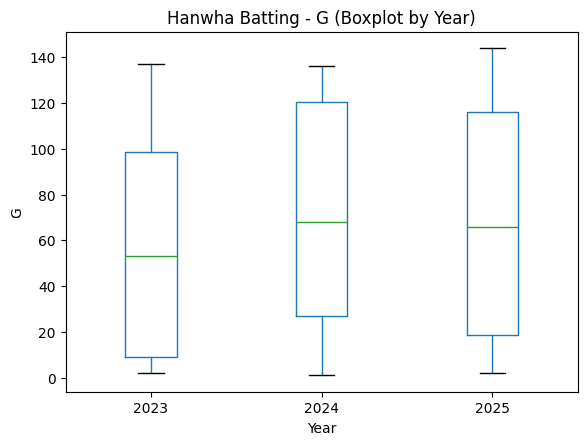

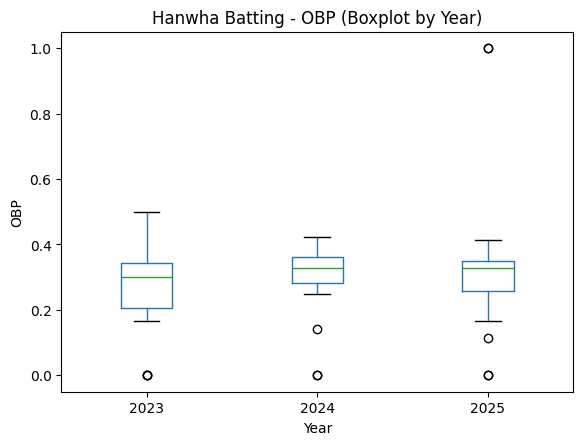

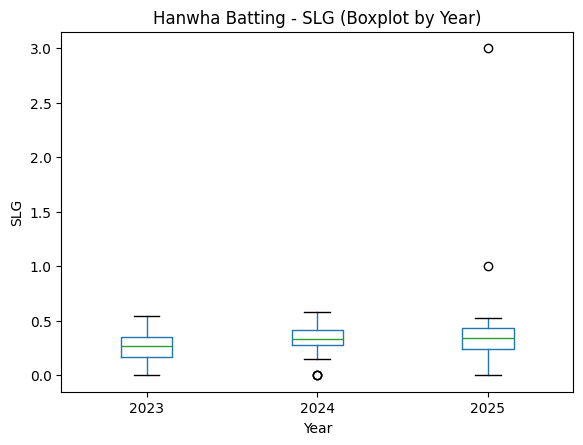

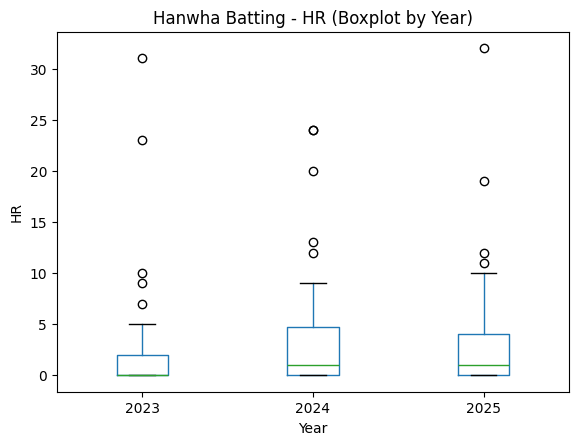

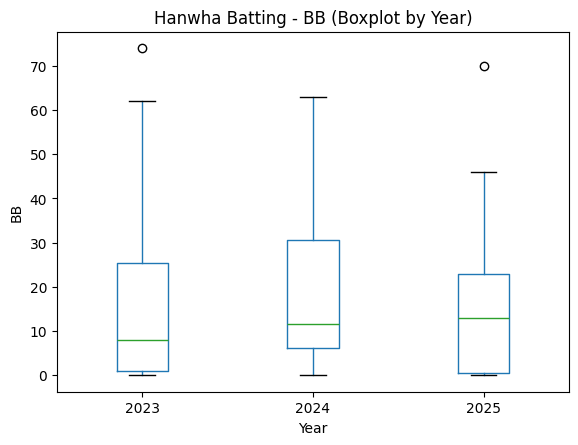

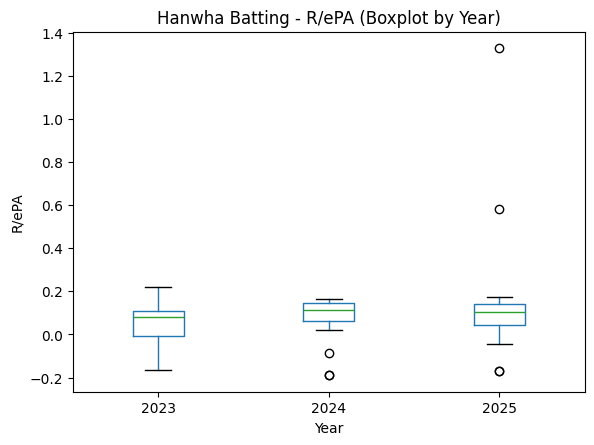

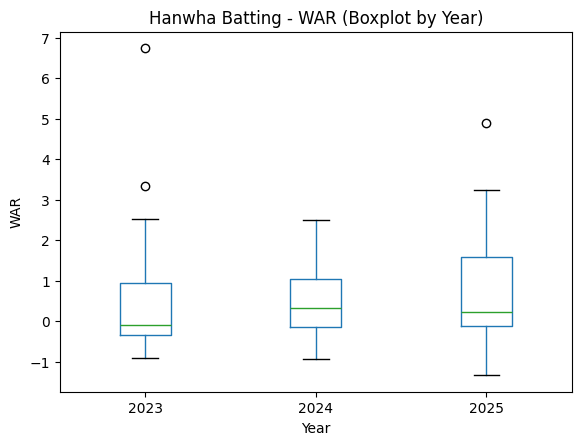

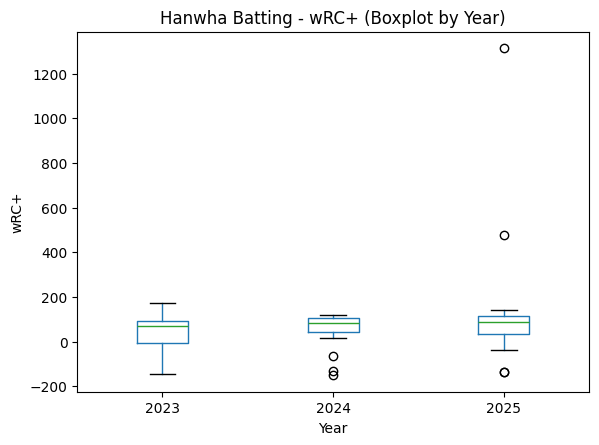

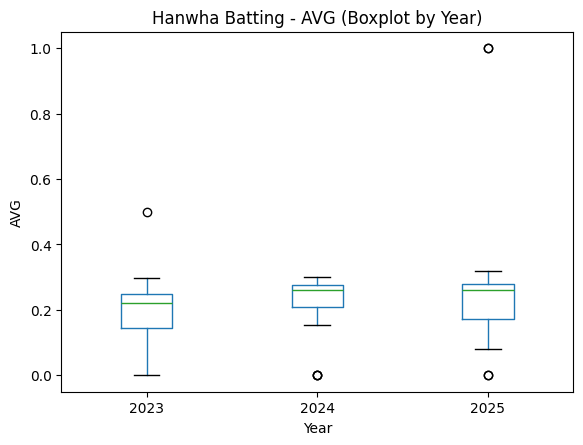

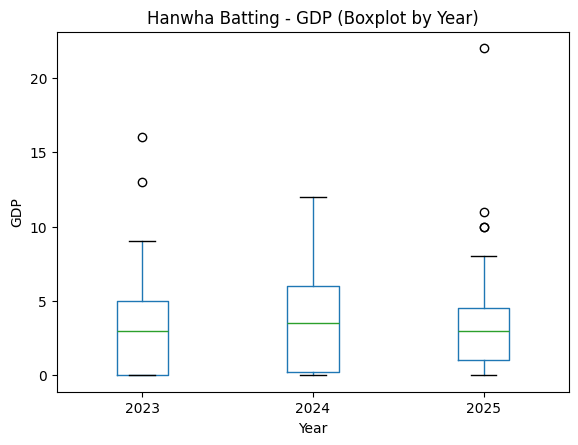

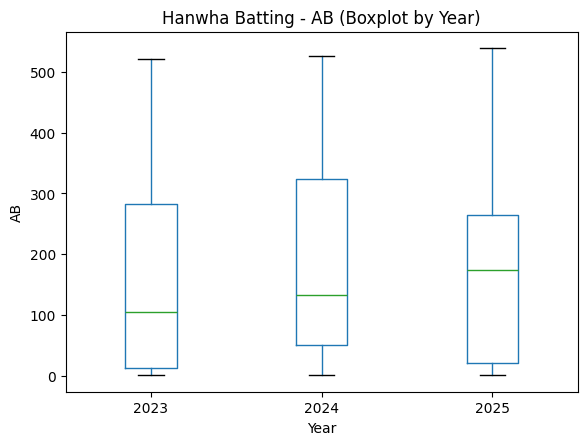

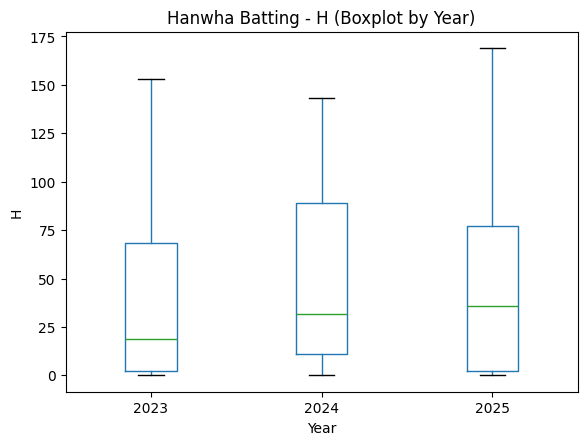

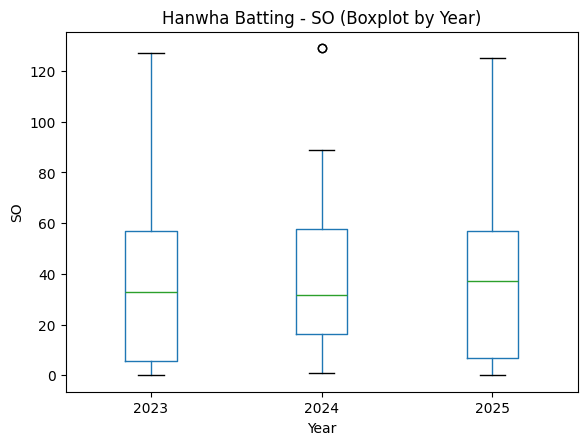

In [72]:
for col in cols_1:
    hanwha_bat.boxplot(column=col, by='Year', grid=False)
    plt.title(f'Hanwha Batting - {col} (Boxplot by Year)')
    plt.suptitle('')
    plt.xlabel('Year')
    plt.ylabel(col)
    plt.show()

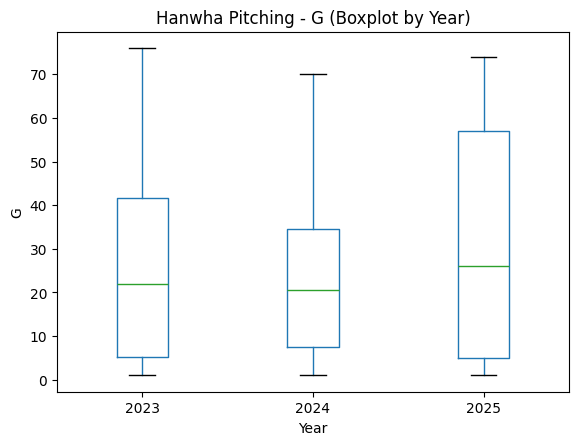

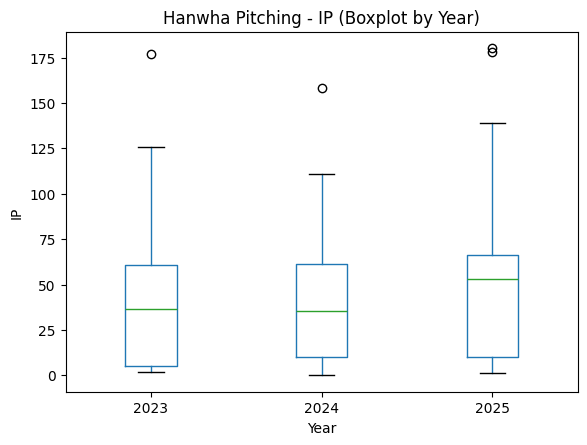

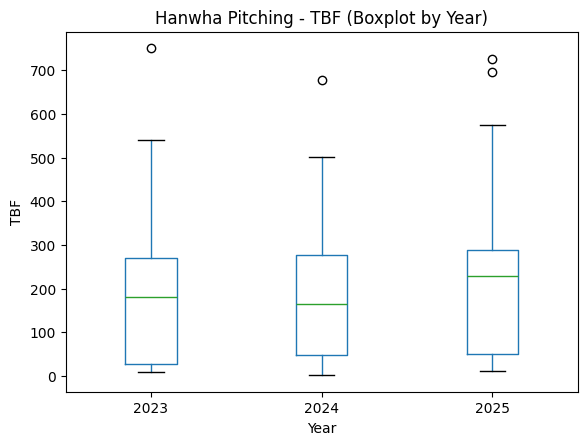

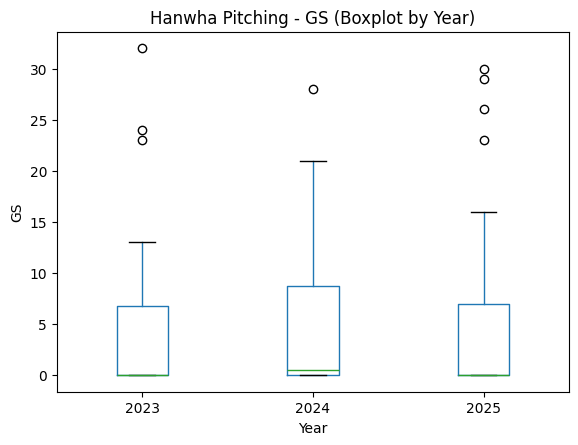

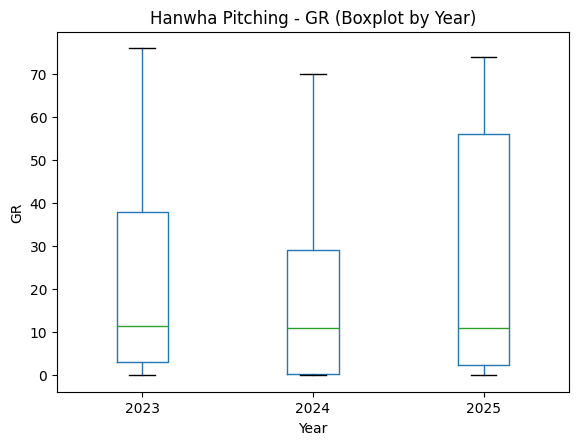

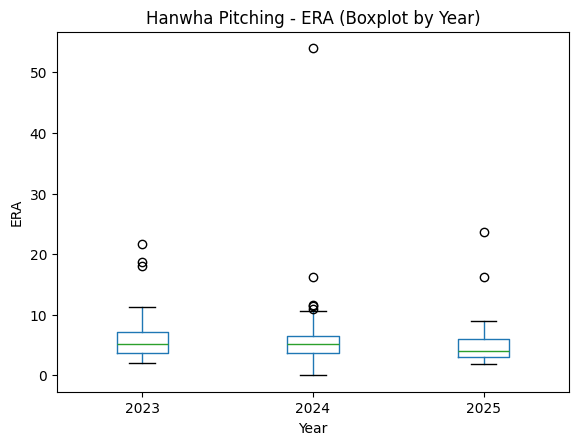

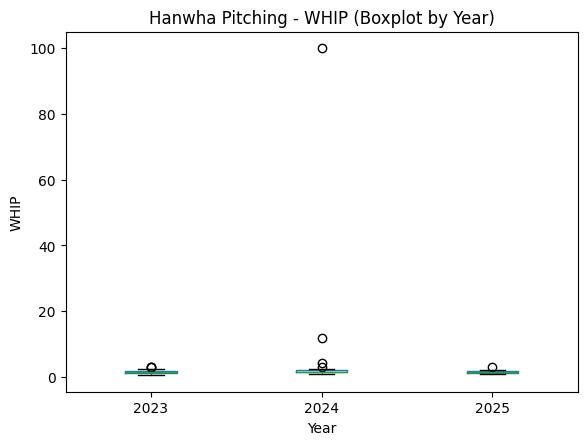

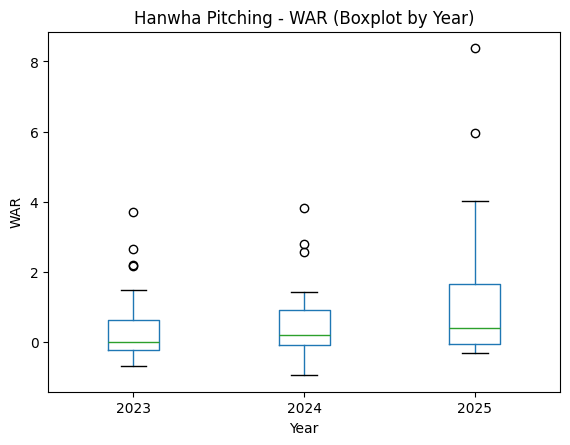

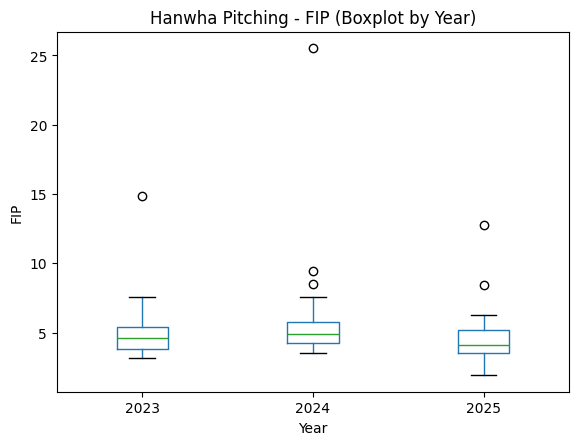

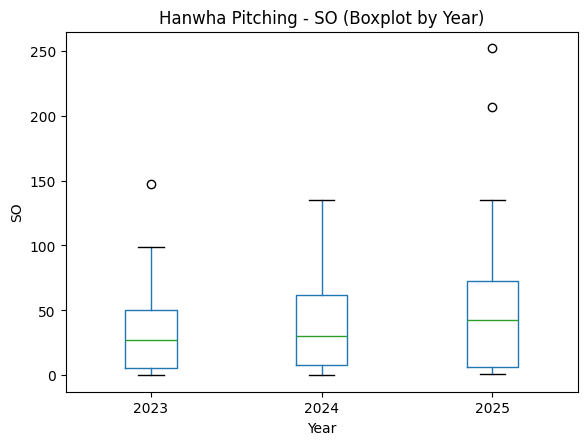

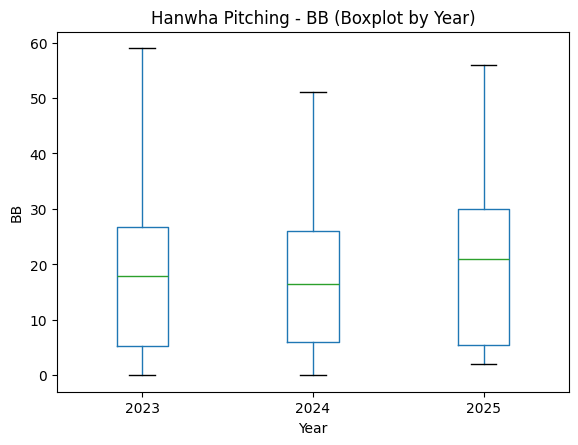

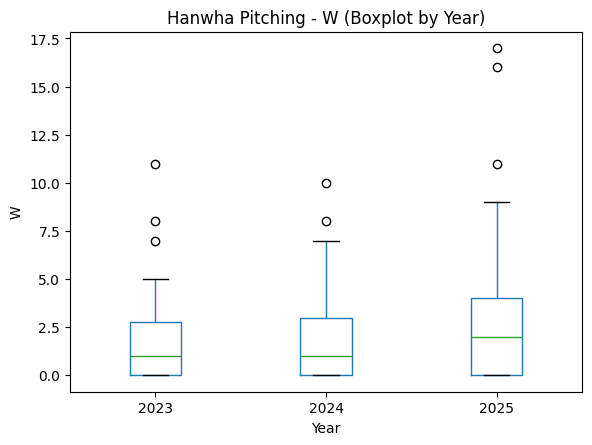

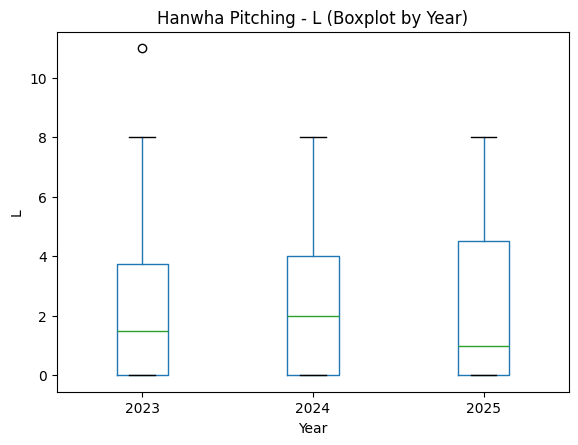

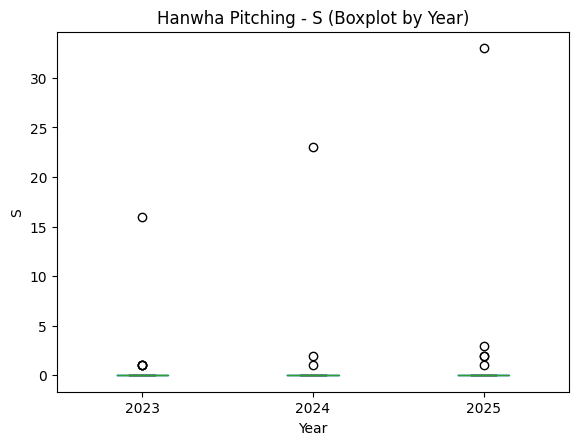

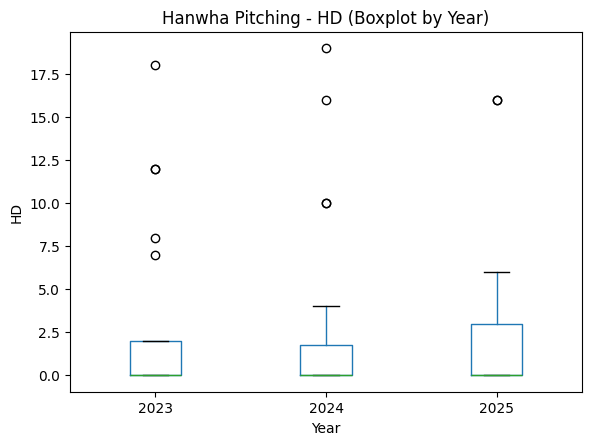

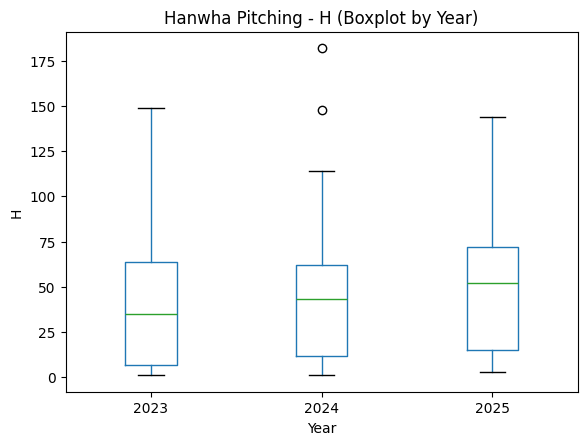

In [75]:
for col in cols_2:
    hanwha_pitch.boxplot(column=col, by='Year', grid=False)
    plt.title(f'Hanwha Pitching - {col} (Boxplot by Year)')
    plt.suptitle('')
    plt.xlabel('Year')
    plt.ylabel(col)
    plt.show()

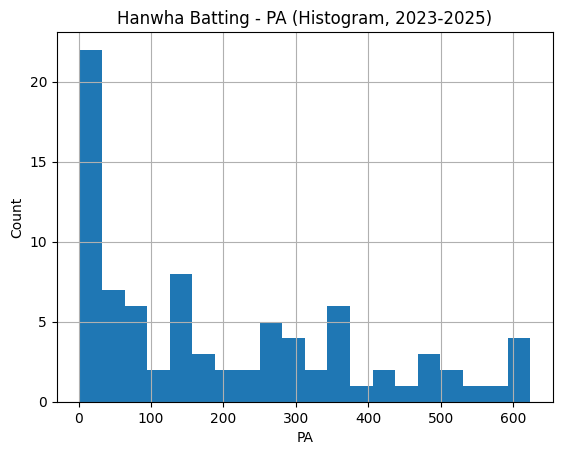

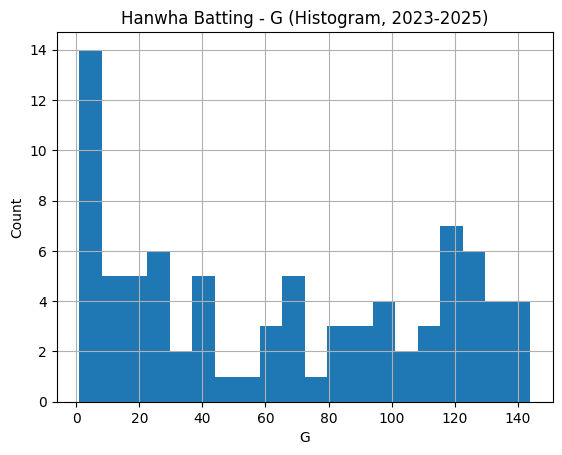

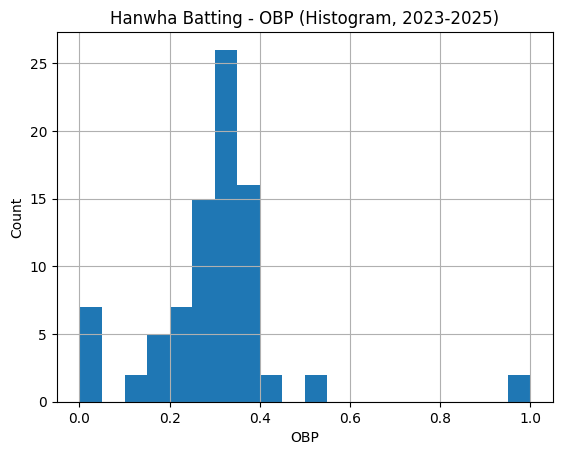

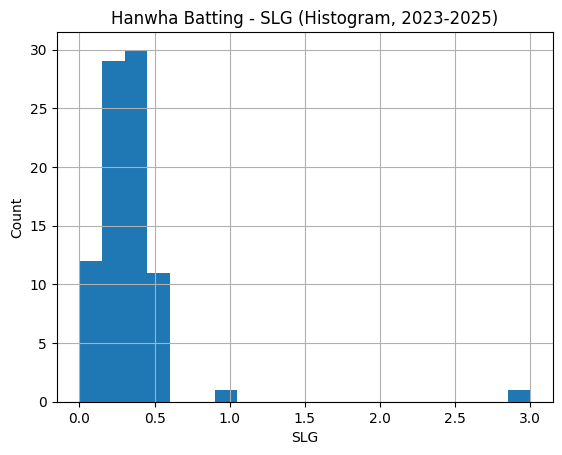

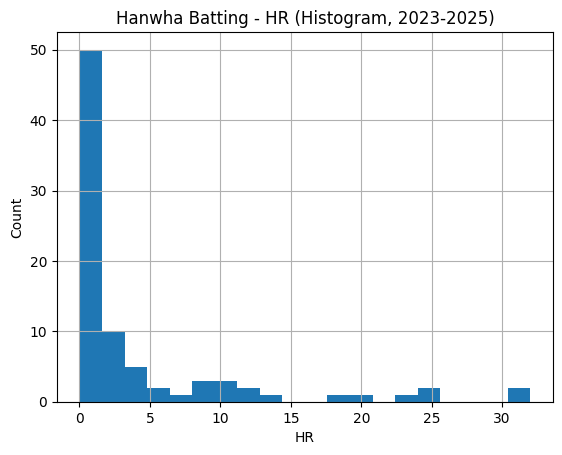

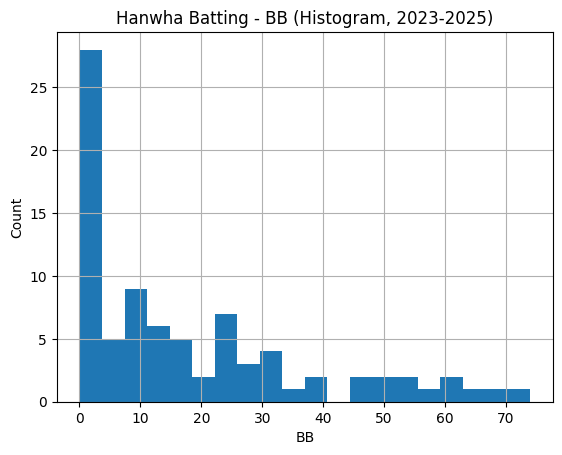

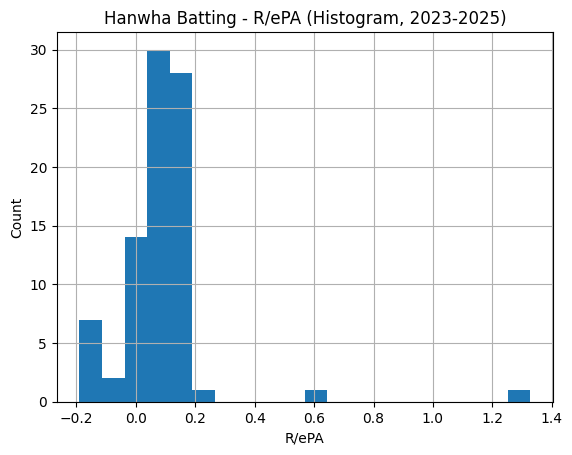

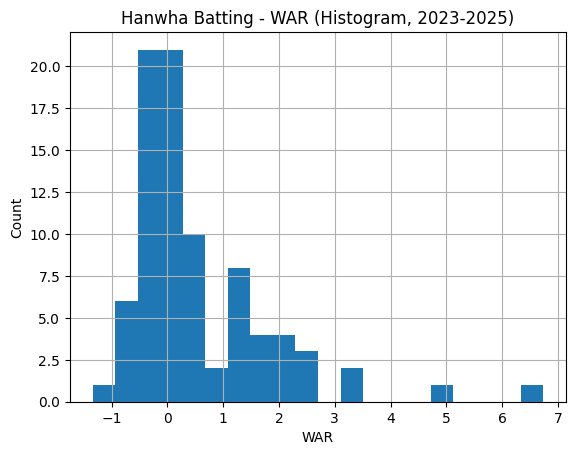

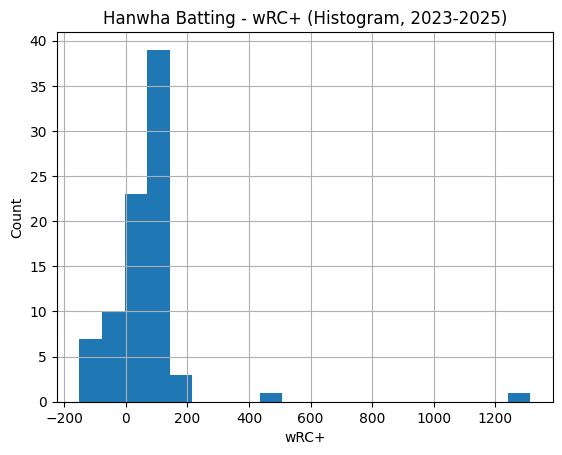

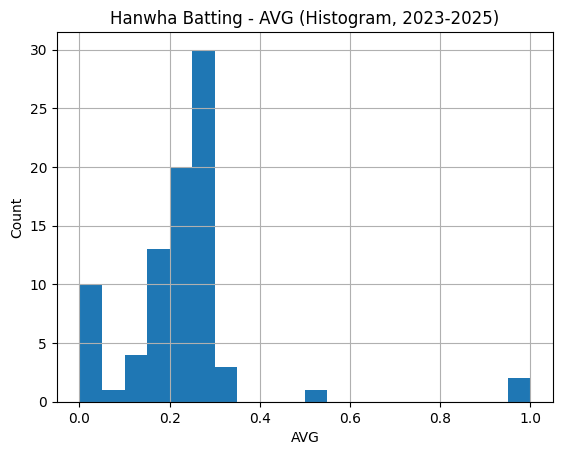

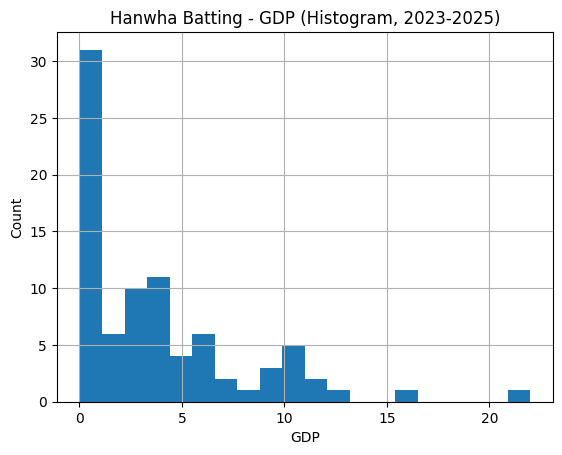

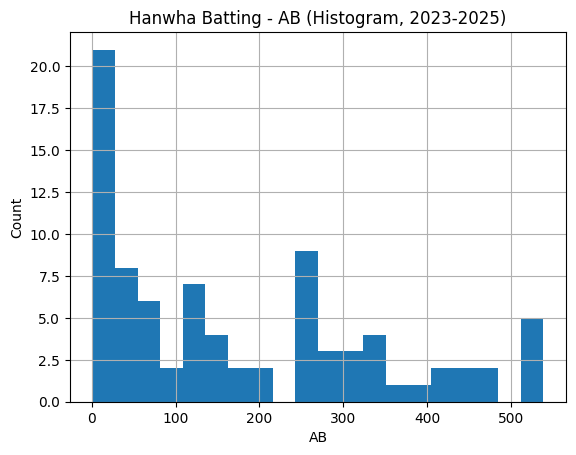

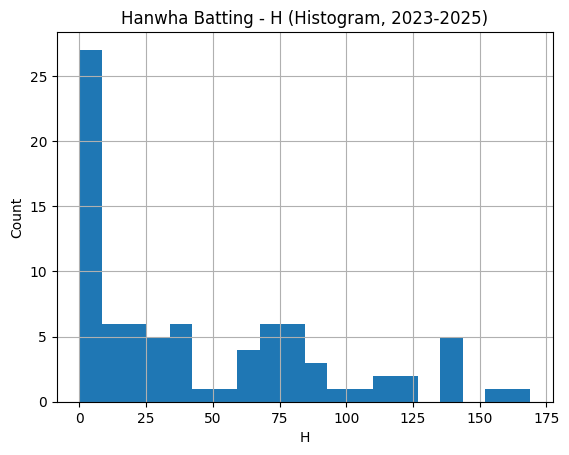

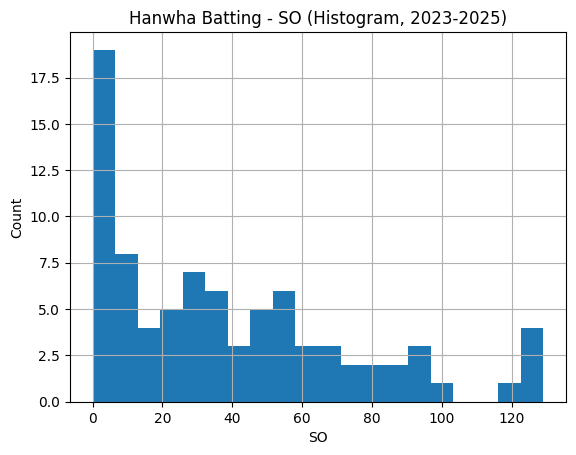

In [76]:
for col in cols_1:
    hanwha_bat[col].dropna().hist(bins=20)
    plt.title(f'Hanwha Batting - {col} (Histogram, 2023-2025)')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

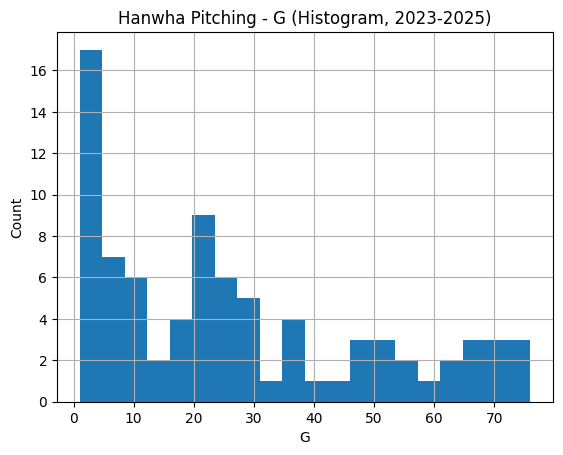

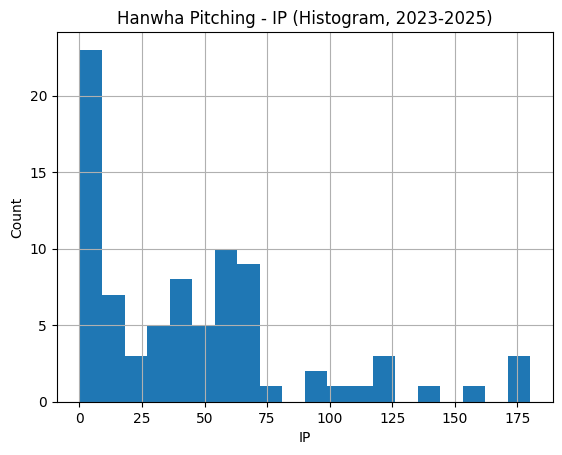

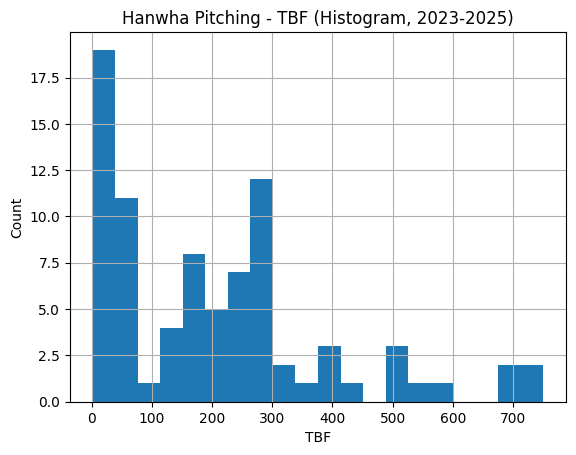

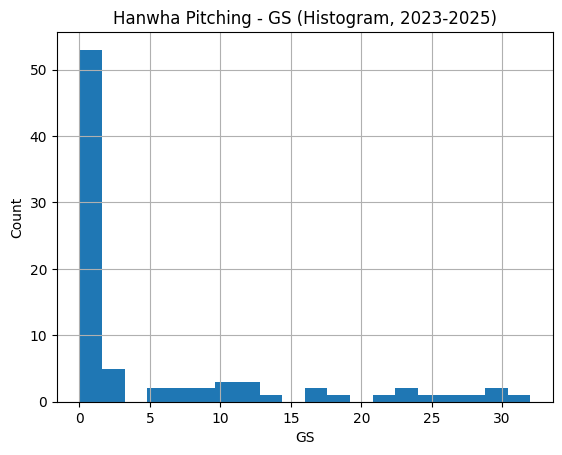

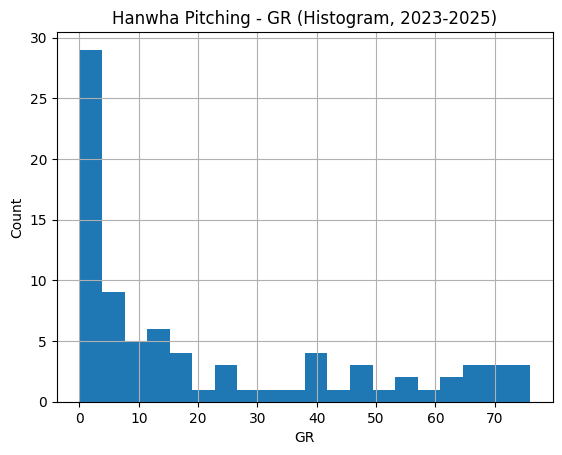

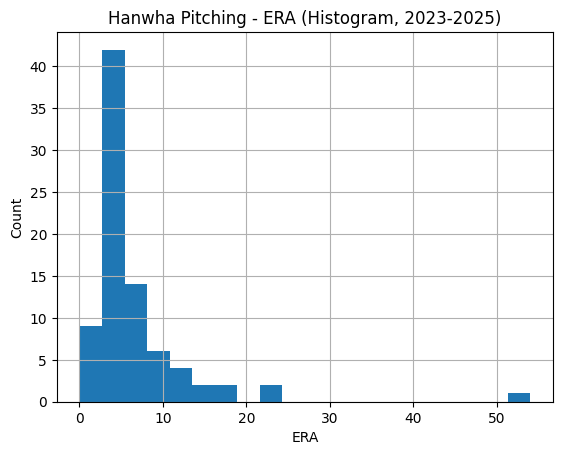

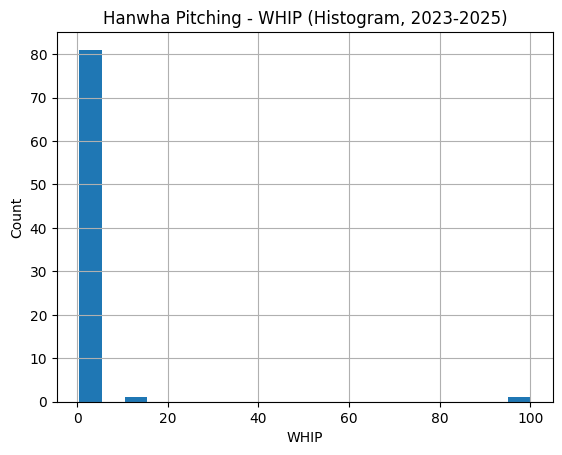

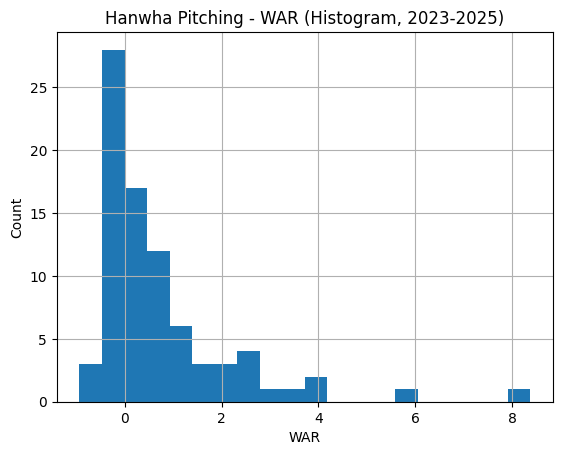

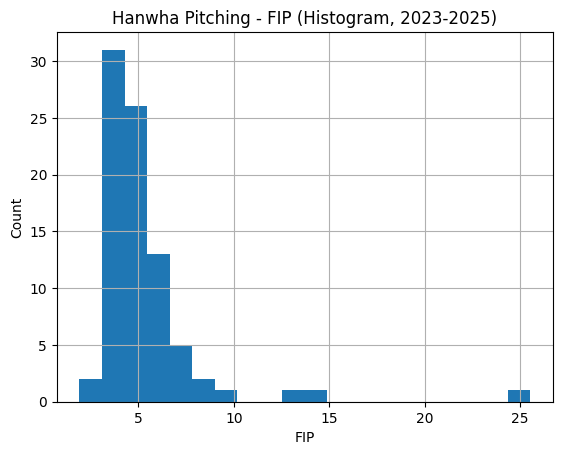

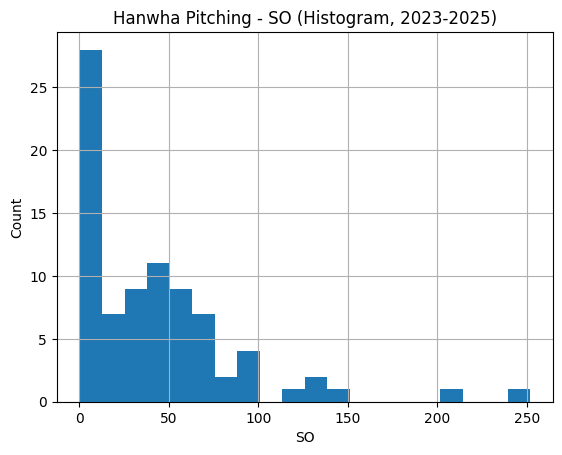

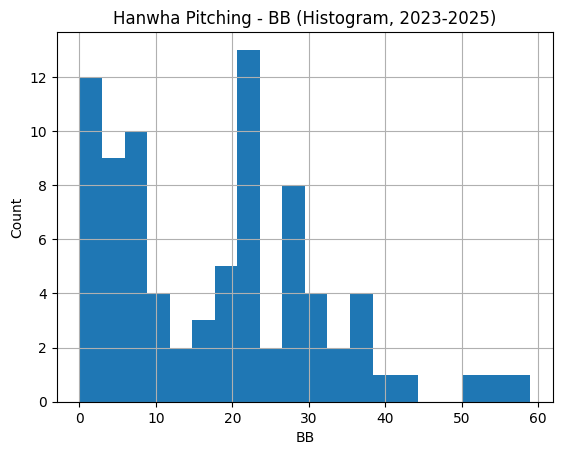

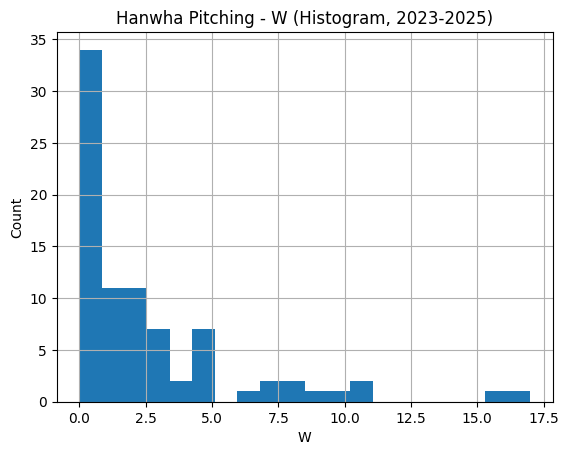

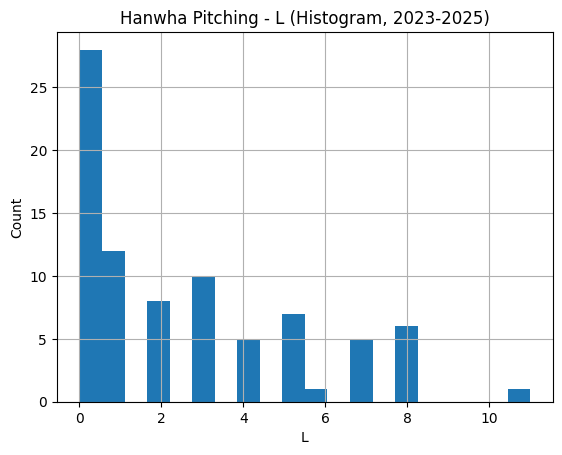

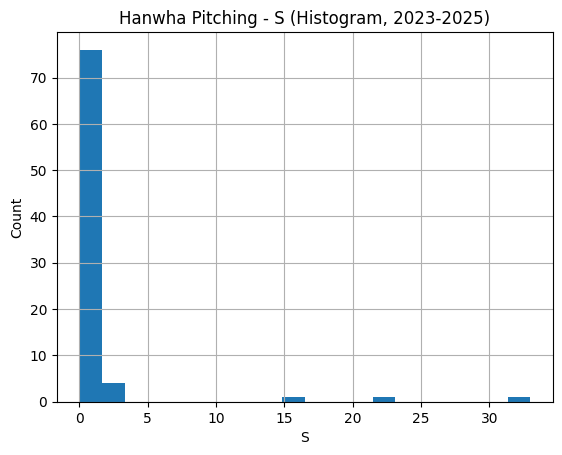

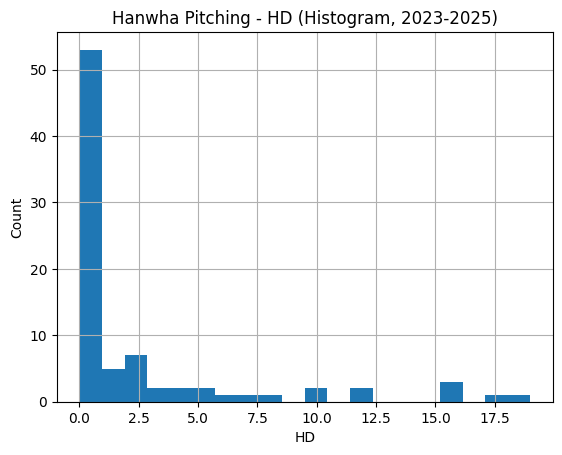

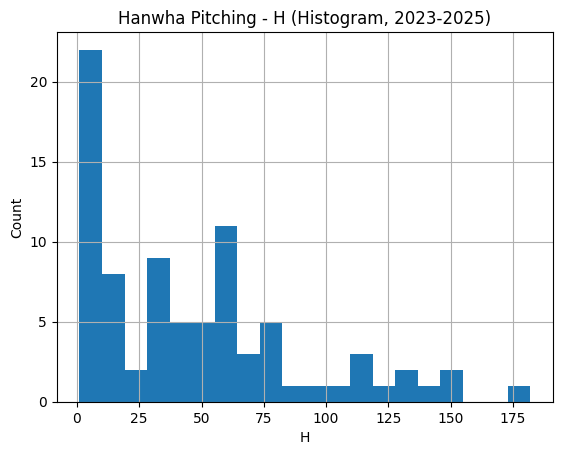

In [77]:
for col in cols_2:
    hanwha_pitch[col].dropna().hist(bins=20)
    plt.title(f'Hanwha Pitching - {col} (Histogram, 2023-2025)')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

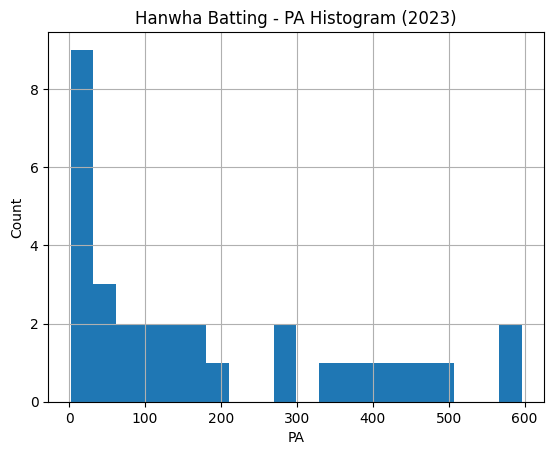

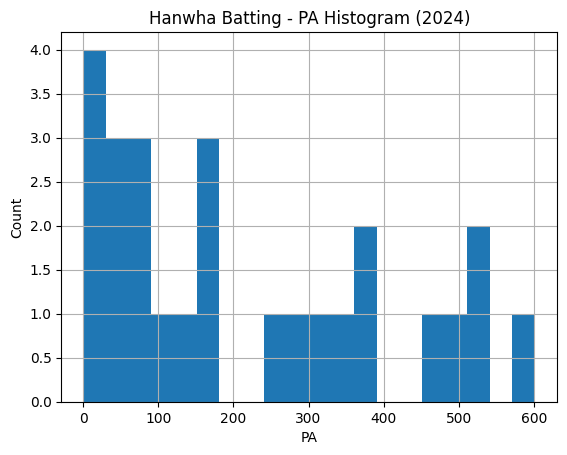

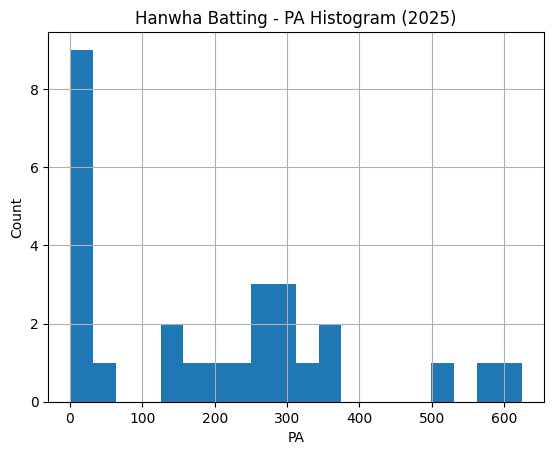

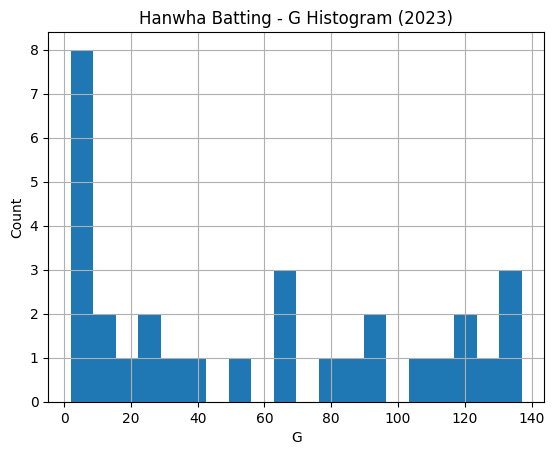

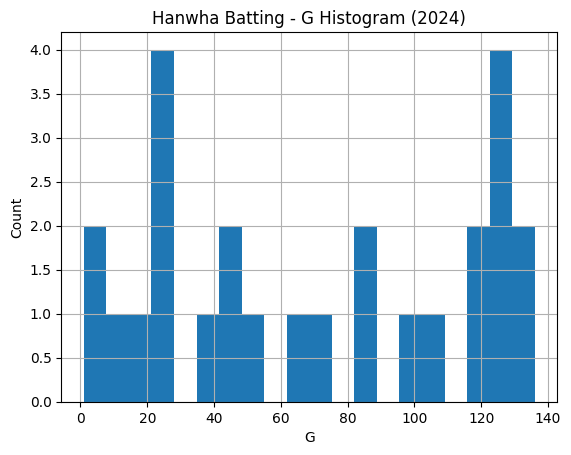

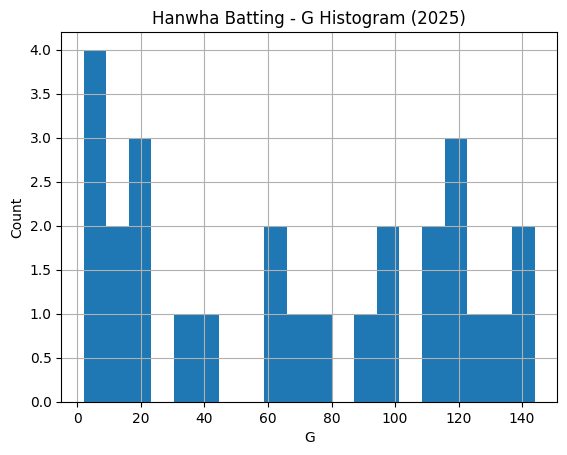

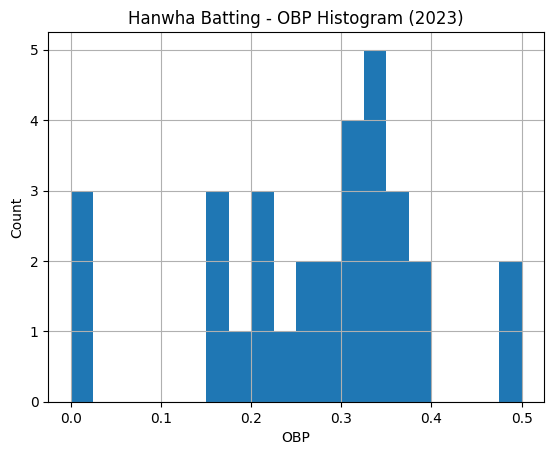

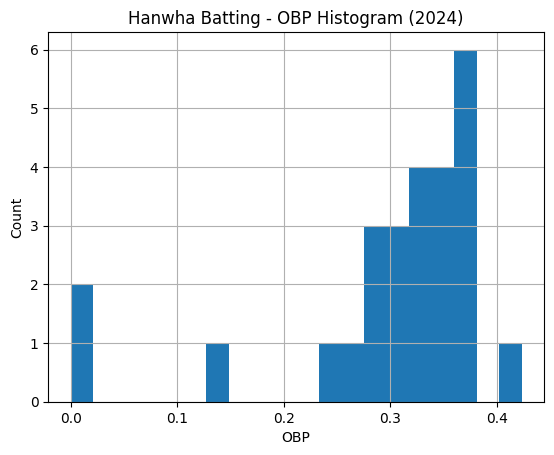

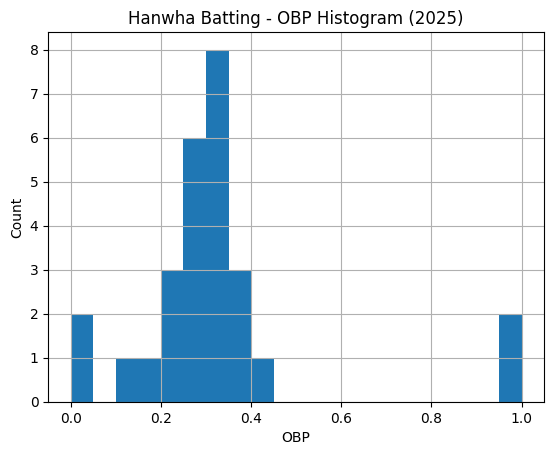

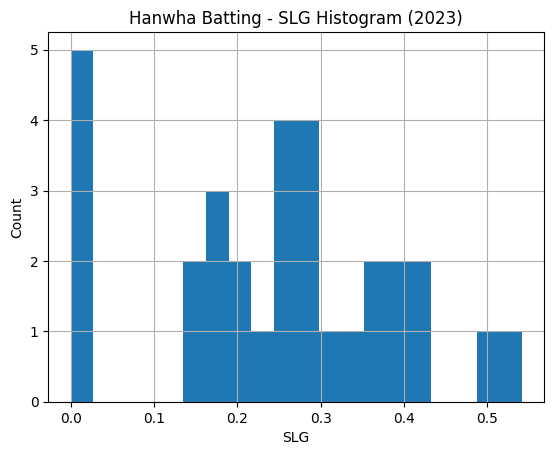

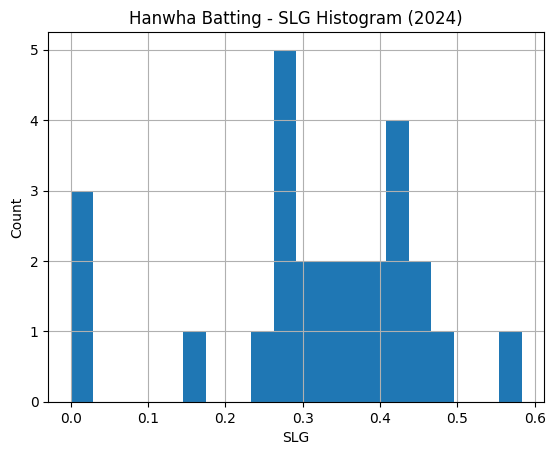

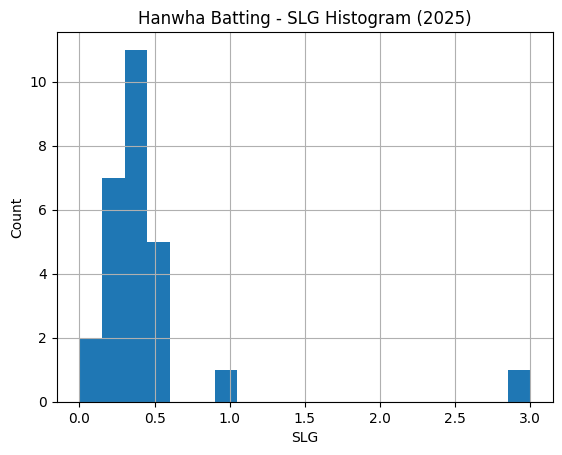

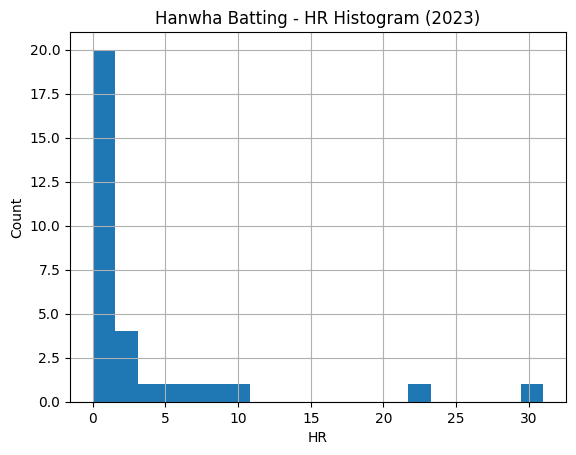

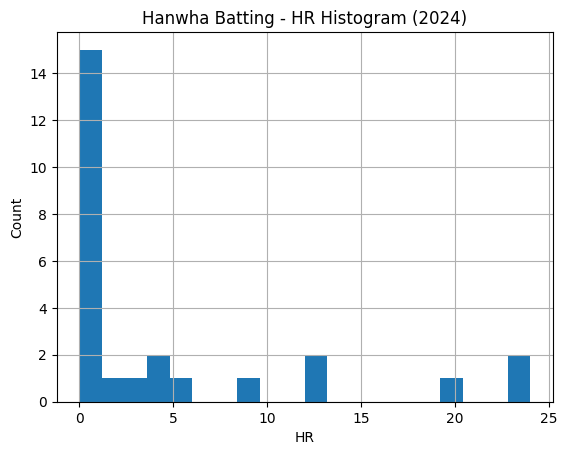

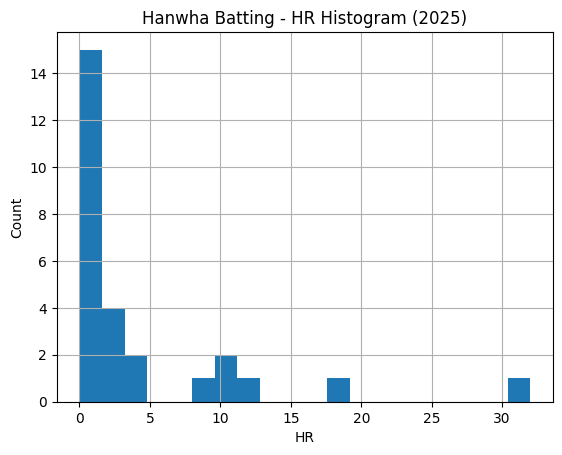

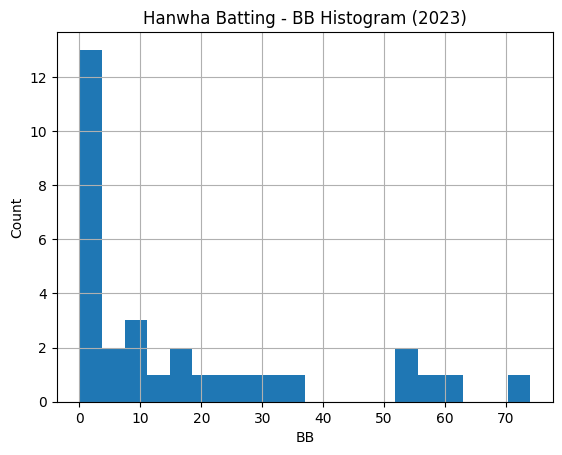

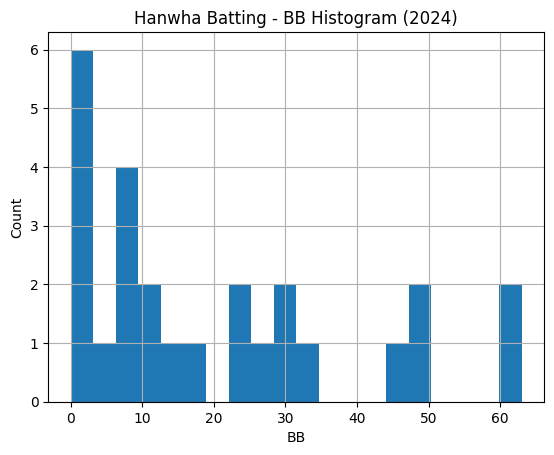

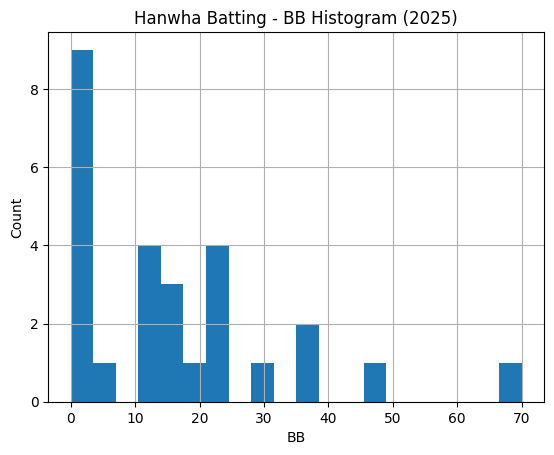

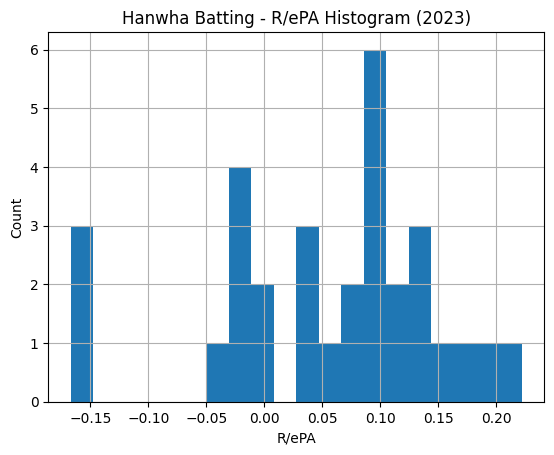

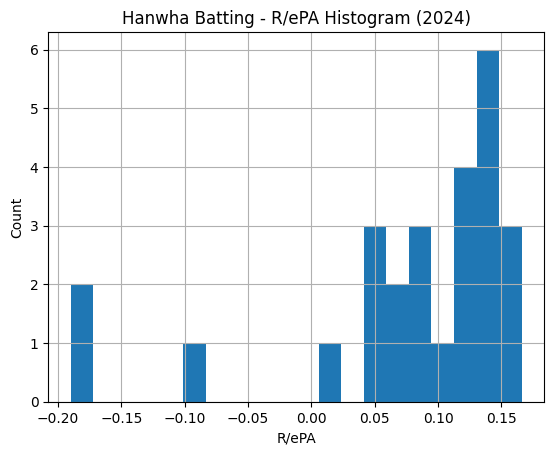

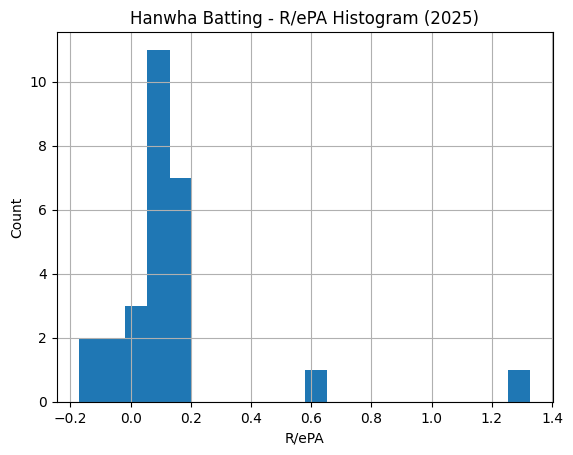

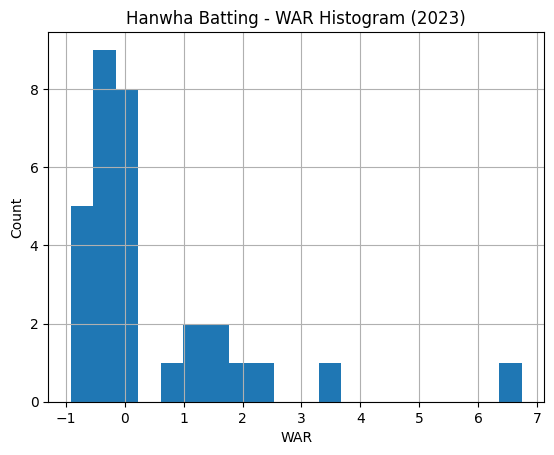

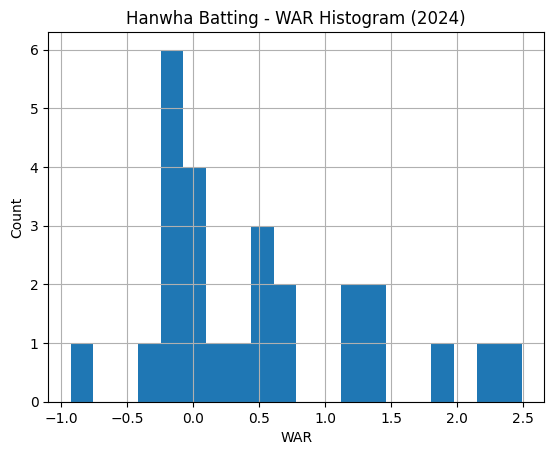

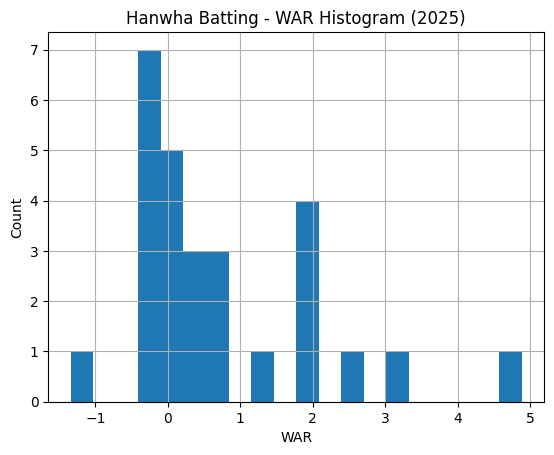

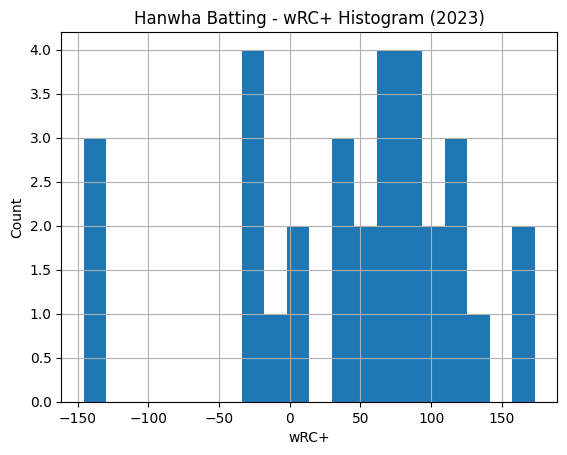

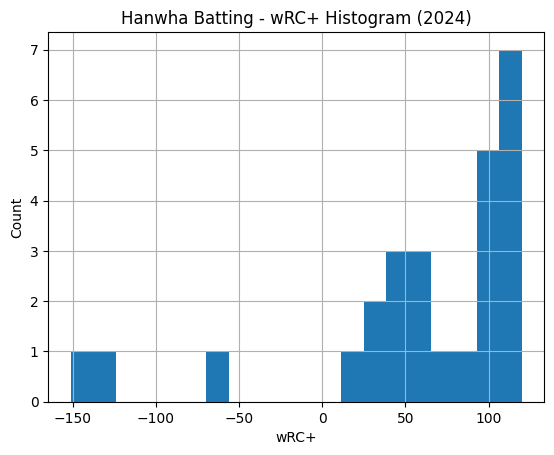

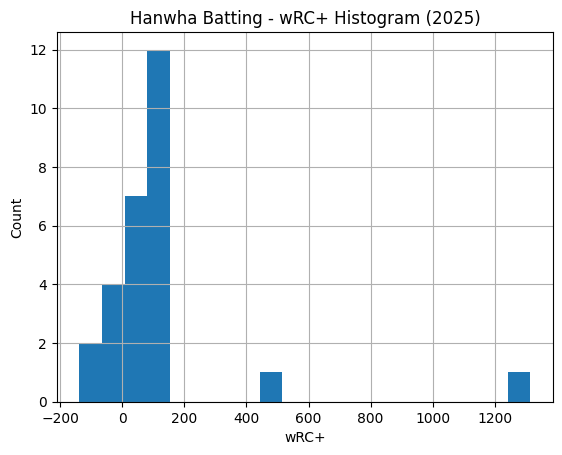

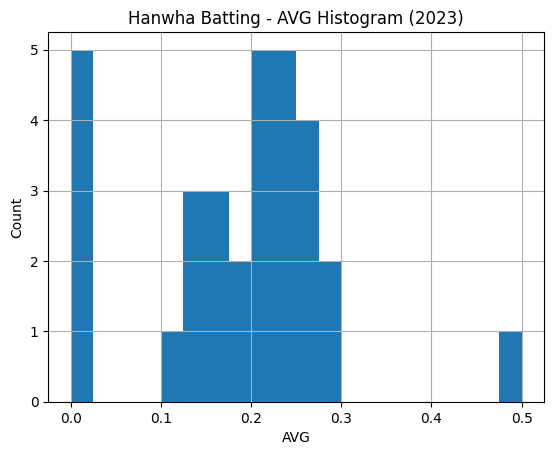

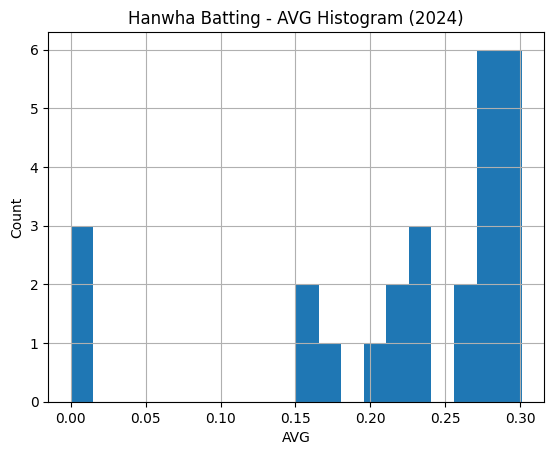

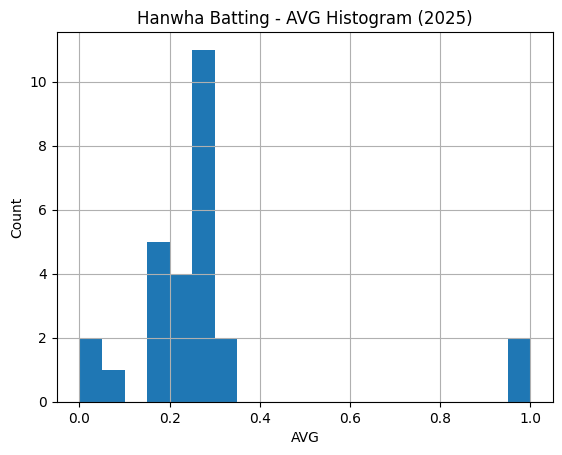

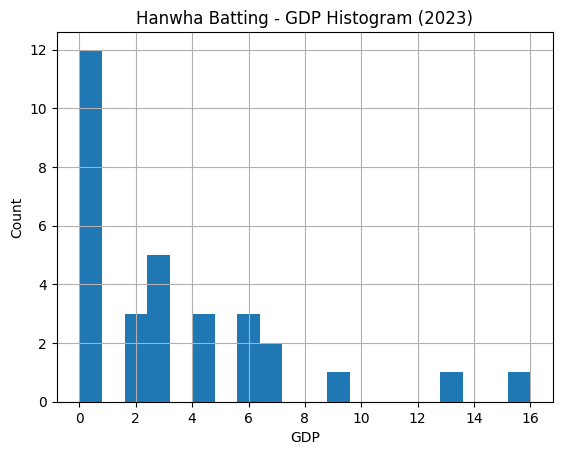

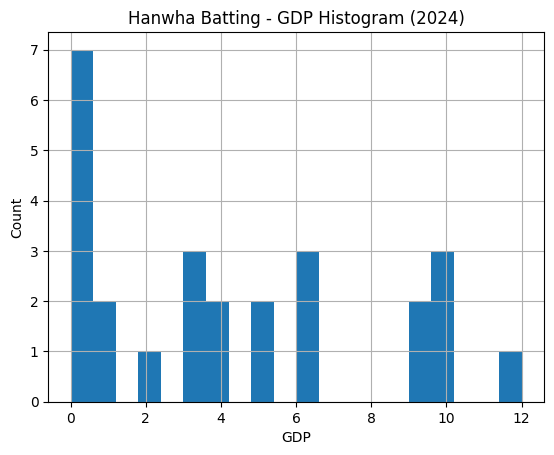

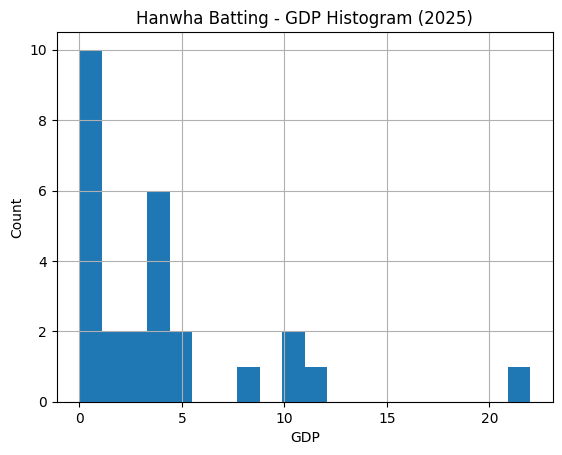

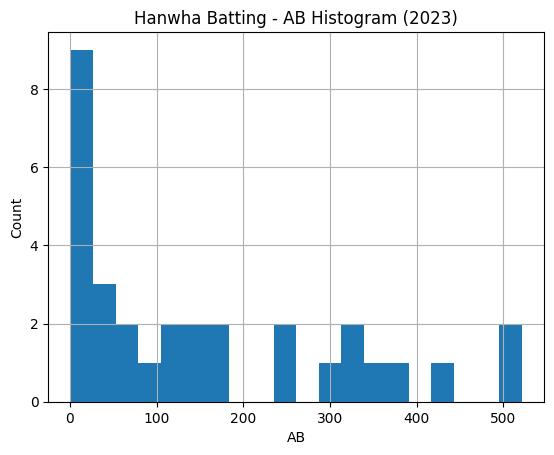

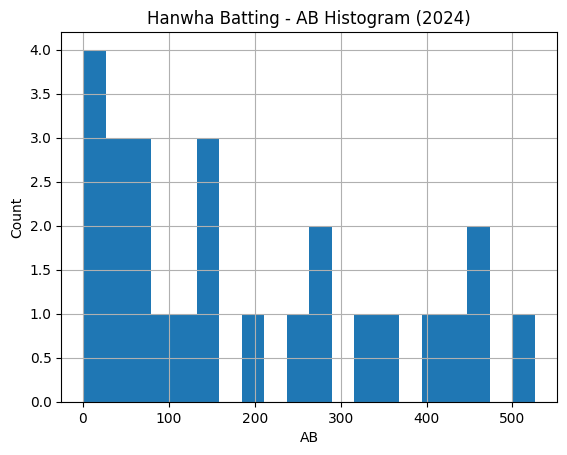

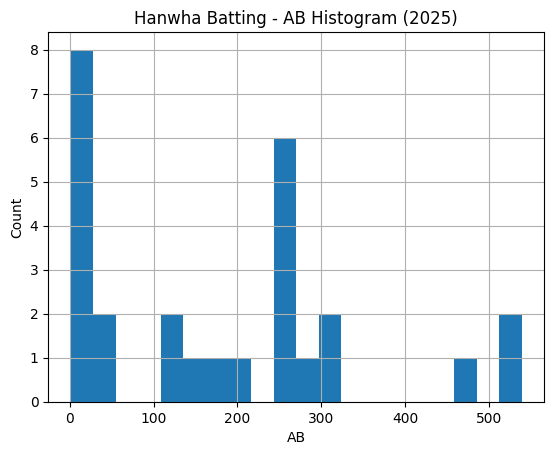

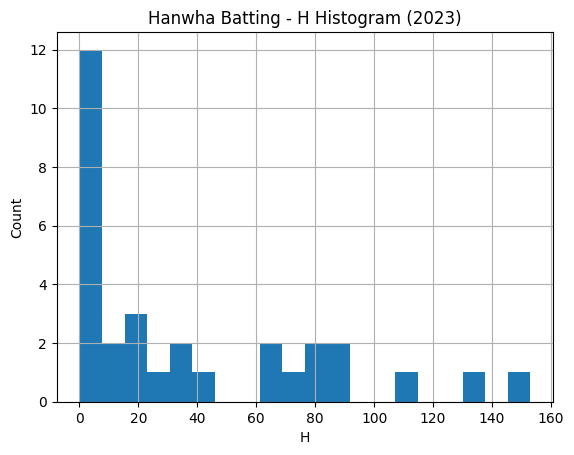

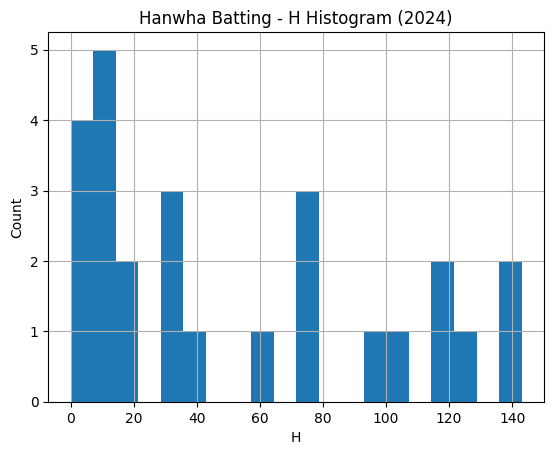

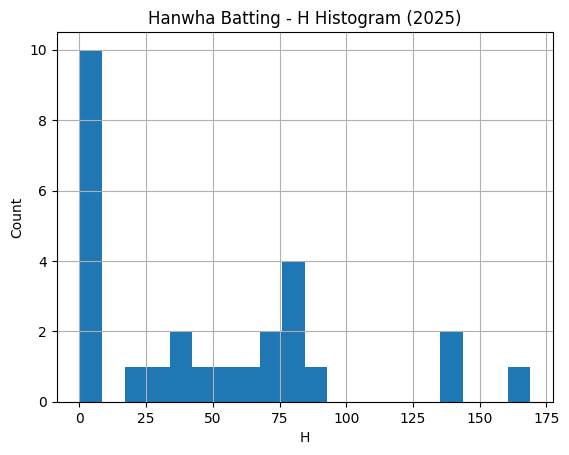

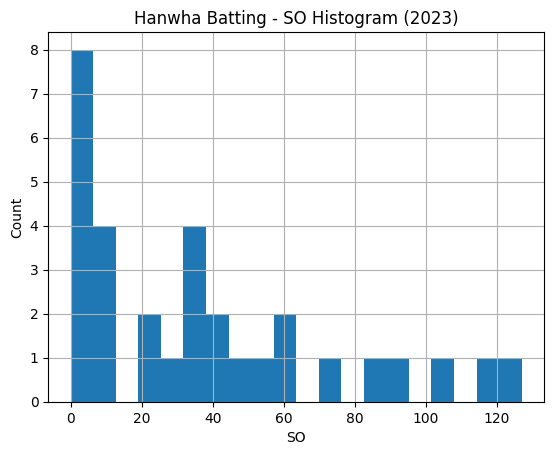

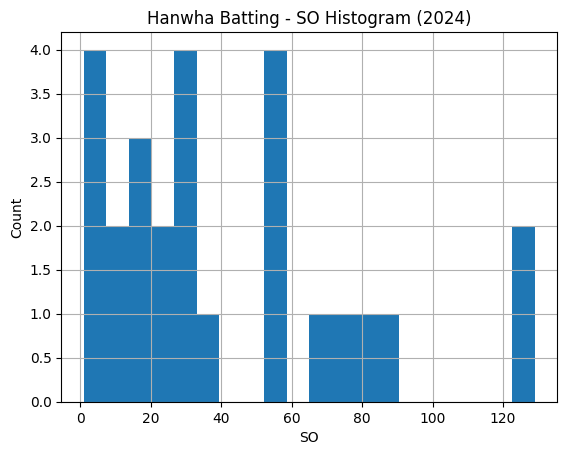

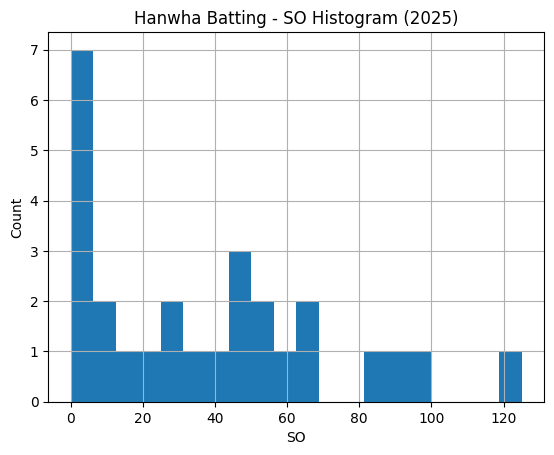

In [79]:
for col in cols_1:
    for y in sorted(hanwha_bat['Year'].unique()):
        hanwha_bat.loc[hanwha_bat['Year'] == y, col].dropna().hist(bins=20)
        plt.title(f'Hanwha Batting - {col} Histogram ({y})')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()

In [81]:
hanwha_bat.pivot_table(
    index='Year',
    columns='Pos.',
    values='Name',
    aggfunc='nunique'
)



Pos.,1B,2B,3B,C,CF,DH,LF,RF,SS
Year,,,,,,,,,
2023,3,1,1,4,4,4,6,3,5
2024,1,2,1,4,6,2,5,2,3
2025,4,3,1,4,2,4,1,6,2
